<a href="https://colab.research.google.com/github/RidhimaJain/StudentPerformance-EDA/blob/main/EDA_Student_Performance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Tite: Exploratory Data Analysis On Student Performance Dataset**

# **1. Introduction**

This dataset contains' demographics, test preparation status and exam scores. The purpose of this analysis is to explore the factors influencing student academic performance and generate insights to support educational improvements.

We hypothesize that:

- Students who complete the test preparation course will have higher exam scores than those who do not.
- The completion of test preparation course has a greater impact on math scores than on reading or writing scores.
- There is no significant difference in test preparation completion rates among different gender or ethnicity groups.
- Math scores are positively correlated with reading and writing scores.
- Students from parents with higher levels of education will perform better in math, reading, and writing exams.
- Female students will score higher than male students in reading and writing exams.
- Students who receive the standard lunch (versus free/reduced lunch) will have higher academic scores.
- There are significant differences in exam scores among different race/ethnicity groups.

This analysis will be useful for educators, school administrators, and policymakers looking to enhance student success.




# **2. Dataset Description:**
This dataset contains information on students’ demographic background, test preparation, and academic performance. The main variables include:

- **Gender:** Male or Female  
- **Race/Ethnicity:** Student’s ethnic group  
- **Parents' Level of Education:** Highest education level achieved by parents (e.g., high school, bachelor's degree)  
- **Lunch:** Type of lunch the student receives (standard or free/reduced)  
- **Test Preparation Course:** Whether the student completed a test preparation course (completed or none)  
- **Math Score:** Score obtained in the math exam (0-100)  
- **Reading Score:** Score obtained in the reading exam (0-100)  
- **Writing Score:** Score obtained in the writing exam (0-100)

These variables help us analyze how different factors relate to student academic performance.

# **3. Import Required Libraries**

We import Python libraries necessary for data manipulation and visualization

In [2]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent theme for all plots
sns.set(style = 'whitegrid')

# **4. Load The Dataset**

The dataset is loaded using the pandas library. The dataset has been uploaded to a GitHub repository. This approach allows the CSV file to be accessed directly via its raw URL, making the code cleaner and removing the need for manual authorization or drive mounting each time the notebook is run.

In [3]:
# Load the dataset from GitHub
url = "https://raw.githubusercontent.com/RidhimaJain/StudentPerformance-EDA/refs/heads/main/StudentsPerformance.csv"

df = pd.read_csv(url)

# **5. Initial Data Inspection**

In this step, we perform an initial examination of the dataset to understand its structure and quality. This includes previewing sample records, checking the dataset’s size, identifying data types, and detecting missing or duplicate values. These insights help inform subsequent data cleaning and analysis steps.

## **5.1. Preview First Few Records**

Display the first 5 rows to get an initial idea of the dataset.

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## **5.2. Check The Dataset Shape**

Check the number of rows and columns in the dataset.

In [5]:
df.shape

(1000, 8)

## **5.3 Dataset Summary Overview**

Check for missing values and data types of each column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Interpretation:** From the output, we see all columns have 1000 non-null values. The data types look correct, with scores as integers and categorical columns as objects. This suggests minimal to no missing data that we may need to handle before analysis.

## **5.4. Statistical Summary of Numeric Columns**

Generate descriptive statistics such as mean, standard deviation, min, max, and quartiles for numerical columns.

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# **6. Data Cleaning/Preprocessing**

Before analyzing or visualizing the data, we clean and prepare it to ensure consistency and accuracy. This includes handling missing values, fixing inconsistent categories, and checking data types.

## **6.1. Handling Missing Values**

We start by identifying and handling any missing values. This ensures the analysis isn't skewed by incomplete data.

In [8]:
# Check for missing values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


**Interpretation:** All columns have complete data- no missing values to handle.

## **6.2. Handle Duplicate Records**

Duplicate records can bias the analysis. We check for and remove any duplicates if found.

In [9]:
# Check for duplicate records
df.duplicated().sum()

np.int64(0)

**Interpretation:** There are no duplicate records in the dataset. This means that we don't need to remove any records before analyzing the dataset.

## **6.3. Standardize Column Names**

To make column names easier to work with, we convert them to lowercase and replace spaces with underscores.


In [10]:
# Check column names to see if they are consistent
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

**Interpretation:** The column names are in lowercases but has spaces that needs to be replaced with underscores to standardize it.

In [11]:
# Replacing ' ' in column names with '_'
df.columns = df.columns.str.replace(' ','_')

# Display Standardized Column Names
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

## **6.4. Data Type Validation**

We validate and adjust data types to ensure each column is represented accurately. For instance, scores should be numeric, while categorical features like gender or parental education level should be of object or category type. This step is crucial for applying correct preprocessing techniques later on.


At step 5.3. Dataset Summary Overview, we found that all the columns have appropriate data types. Therefore, we do not need to change data type of any column.

## **6.5. Identify Numerical and Categorical Columns**

We categorize columns into numerical and categorical groups to streamline further analysis. This enables targeted handling during cleaning, visualization, and modeling.

In [12]:
# Identify categorical and numerical columns for targeted processing
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [13]:
# Display categorical columns
categorical_cols

['gender',
 'race/ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [14]:
# Display numerical columns
numerical_cols

['math_score', 'reading_score', 'writing_score']

## **6.6. Standardize Categorical Features and Explore Unique Values**

In this section, we clean the categorical columns by standardizing text formats—removing extra spaces and ensuring consistent casing. This step is essential to avoid misleading results when analyzing unique categories. After cleaning, we explore the unique values in each categorical column to understand the feature space and identify any anomalies or inconsistencies.

### **6.6. A. Standardizing Categorical Features**

In [15]:
# Clean categorical columns: strip whitespaces and lowercase all strings
for cols in categorical_cols:
  df[cols] = df[cols].str.strip().str.lower()

### **6.6. B. Explore Unique Values in Categorical Features**

In [16]:
# Display unique values for each categorical feature

for col in categorical_cols:
  print(f"Unique values in {col}:")
  print(df[col].unique())
  print("\n")

Unique values in gender:
['female' 'male']


Unique values in race/ethnicity:
['group b' 'group c' 'group a' 'group d' 'group e']


Unique values in parental_level_of_education:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Unique values in lunch:
['standard' 'free/reduced']


Unique values in test_preparation_course:
['none' 'completed']




## **6.7. Outlier Detections for Numerical Features**

In this step, we investigate potential outliers in the numerical columns using boxplots. Outliers can indicate data entry errors or unusual behavior.

### **6.7. A. Visualizing Outliers through Boxplot**

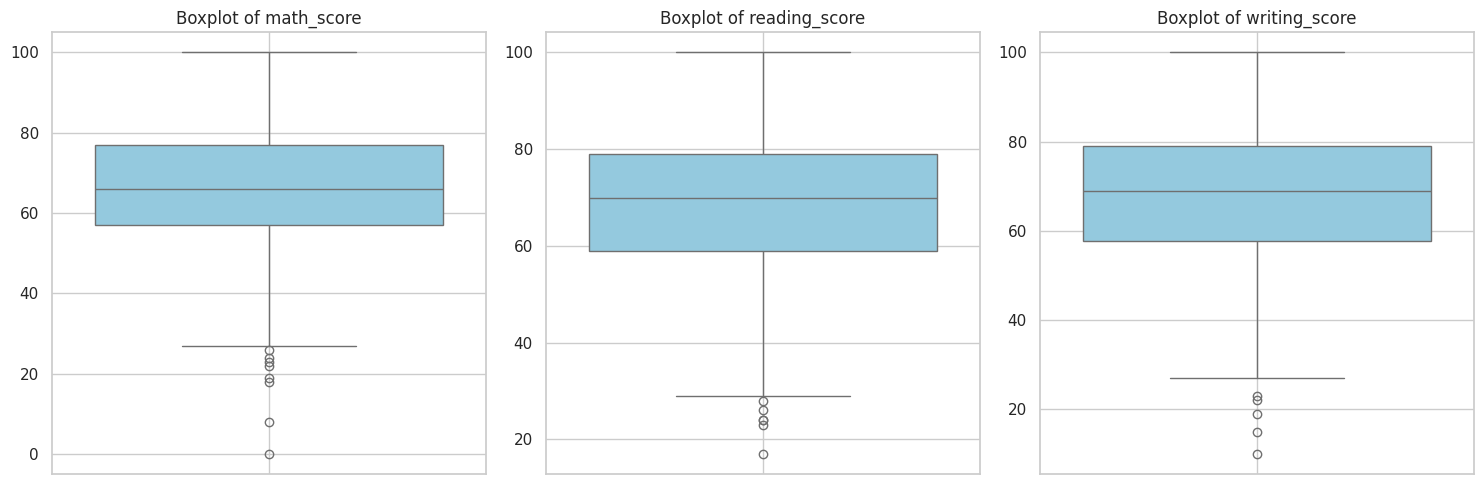

In [17]:
# Set up the figure size for all boxplots
plt.figure(figsize=(15, 5))

# Loop through each numerical column and plot a boxplot
for i, col in enumerate(numerical_cols):
    # Create a subplot for each boxplot (1 row, 3 columns, current position i+1)
    plt.subplot(1, 3, i + 1)

    # Create a vertical boxplot for the current column
    sns.boxplot(y=df[col], color='skyblue')

    # Add a title to the subplot
    plt.title(f'Boxplot of {col}')

    # Remove the y-axis label for a cleaner look
    plt.ylabel('')

    # Add grid lines to the plot for better readability
    plt.grid(True)

# Automatically adjust subplot spacing to prevent overlap
plt.tight_layout()

# Display all the plots
plt.show()

**Interpretation:** Based on the boxplot, we observe that:

- Math Score: A few low-end outliers
- Reading Score -  A few low-end outliers and the data is left skewed as the bottom whisker is longer.
- Writing Score: A few low-end outliers

### **6.7. B. Statistical Detection of Outliers using IQR**

In addition to visual inspection through boxplots, we use the IQR method to programmatically detect potential outliers in the numerical features. This helps in identifying the number and position of values that lie far outside the normal range and could distort our analysis.


In [18]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25%)
    Q3 = data[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1                     # Interquartile range
    lower_bound = Q1 - 1.5 * IQR      # Lower limit for non-outliers
    upper_bound = Q3 + 1.5 * IQR      # Upper limit for non-outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Loop through numerical columns and report number of outliers in each
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers detected")

math_score: 8 outliers detected
reading_score: 6 outliers detected
writing_score: 5 outliers detected


# **7. Exploratory Data Analysis -  Visualization and Insights**

In this section, we explore the dataset in depth through visual and statistical methods to uncover underlying patterns, distributions, and relationships among variables. This involves both univariate and bivariate analyses to understand how different demographic and educational factors may influence student performance.

Visualizations such as histograms, box plots, bar charts, and correlation heatmaps are used to reveal trends, detect anomalies, and test the hypotheses defined earlier. The goal is to derive actionable insights that inform the interpretation of student performance outcomes.



## **7.1. Univariate Analysis**

 Univariate Analysis help understand the distribution and characteristics of individual variables within the dataset.
In this step, we explore each feature independently to identify patterns, dominant categories, central tendency, spread, and potential anomalies.


### **7.1. A. Univariate Analysis -  Categorical Features**

For categorical variables, we focus on frequency distributions.

**Gender Univariate Visualization:**
- Plot Chosen: Count Plot as it shows frequency(count) in each category.

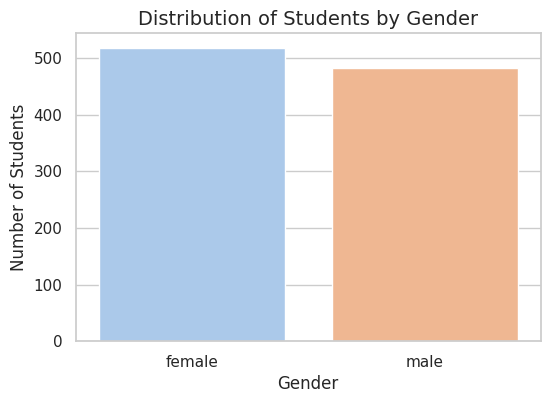

In [23]:
# Creating the count plot for gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, hue= 'gender', palette='pastel', legend =  False)

# Adding plot title and axis labels
plt.title('Distribution of Students by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

# Displaying the plot
plt.show()

**Interpretation:** Female students are more than male students by a slight margin.


---



**Race/Ethinicity:**
- Plot Chosen: Count Plot(Ordered)  as it shows the frequency(count) in each category in an ordered/sorted fashion.

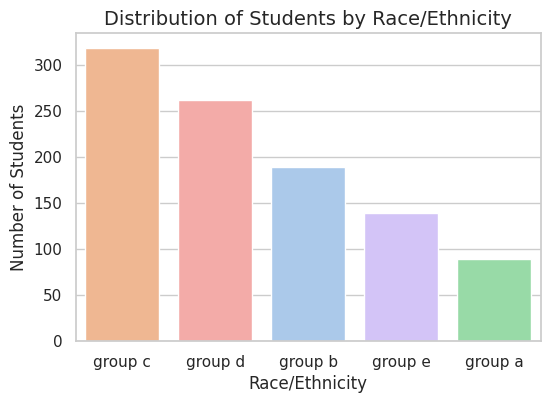

In [27]:
# Count the values in each category and sort them
order = df['race/ethnicity'].value_counts().index

#Create the count plot for race/ethnicity
plt.figure(figsize=(6, 4))
sns.countplot(x='race/ethnicity', data=df, hue='race/ethnicity', palette='pastel', order=order)

# Add plot title and axis labels
plt.title('Distribution of Students by Race/Ethnicity', fontsize=14)
plt.xlabel('Race/Ethnicity', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

# Display the plot
plt.show()

**Interpretation:** Maximum number of students belong to race/ethnicity c and least belong to group a.


---



**Parental Education Level:**
- Plot Chosen: Horizontal Ordered Count Plot as it shows the frequency(count) in each category horizontally in a sorted order and it suited for categories with long labels that might overlap or cramp together in x-axis.

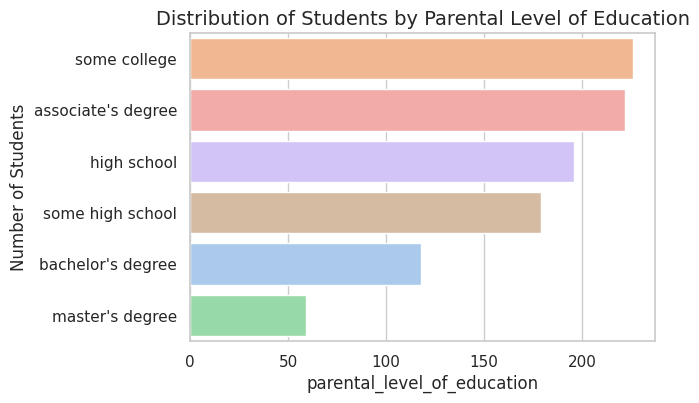

In [28]:
# Count the values in each category and sort them
order = df['parental_level_of_education'].value_counts().index

#Create the count plot for race/ethnicity
plt.figure(figsize=(6, 4))
sns.countplot(y='parental_level_of_education', data=df, hue='parental_level_of_education', palette='pastel', order=order)

# Add plot title and axis labels
plt.title('Distribution of Students by Parental Level of Education', fontsize=14)
plt.xlabel('parental_level_of_education', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

# Display the plot
plt.show()

**Interpretation:** Least number of student's parents' education level is Master's Degrees while maximum number of parents' education level is some college.


---



**Lunch Type:**
- Plot Chosen: Count Plot as it shows the frequency(count) in each category

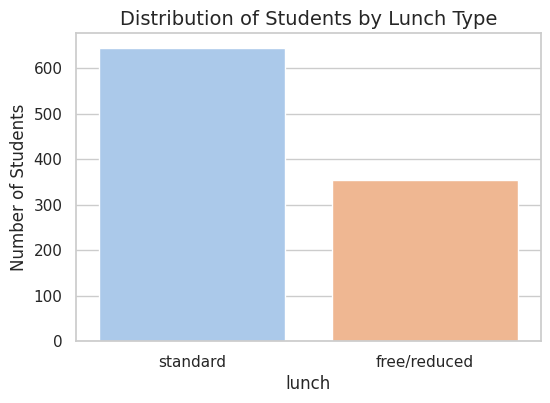

In [34]:
#Create the count plot for race/ethnicity
plt.figure(figsize=(6, 4))
sns.countplot(x='lunch', data=df, hue='lunch', palette='pastel')

# Add plot title and axis labels
plt.title('Distribution of Students by Lunch Type', fontsize=14)
plt.xlabel('lunch', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

# Display the plot
plt.show()

**Interpretation:** It is evident that most students take standard lunch type, almost twice of free/reduced lunch type.


---



**Test Preparation Course:**
- Plot Chosen: Count Plot as it shows the frequency(count) in each category

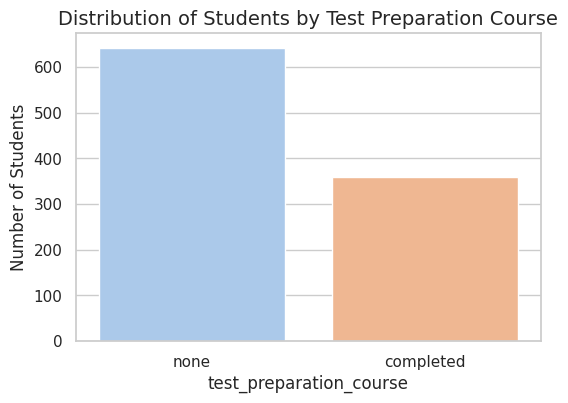

In [35]:
#Create the count plot for race/ethnicity
plt.figure(figsize=(6, 4))
sns.countplot(x='test_preparation_course', data=df, hue='test_preparation_course', palette='pastel')

# Add plot title and axis labels
plt.title('Distribution of Students by Test Preparation Course', fontsize=14)
plt.xlabel('test_preparation_course', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

# Display the plot
plt.show()

**Interpretation:** It is evident that most students did not take any test preparation course which is almost twice of the ones who completed test preparation course.

---



### **7.1. B. Univariate Analysis - Numerical Features**

For numerical variables, we analyze measures like mean, median, skewness, and detect outliers through visualization tools like histograms and boxplots

**Numerical Features:** Math Score, Reading Score, Writing Score

**Plot Chosen:** Histogram for all 3 numerical features because:
It shows the distribution of scores — how many students fall into different score ranges.

Helps identify:

- Shape of distribution (normal, skewed, bimodal, etc.)

- Presence of gaps or multiple peaks

- Whether scores cluster around certain values

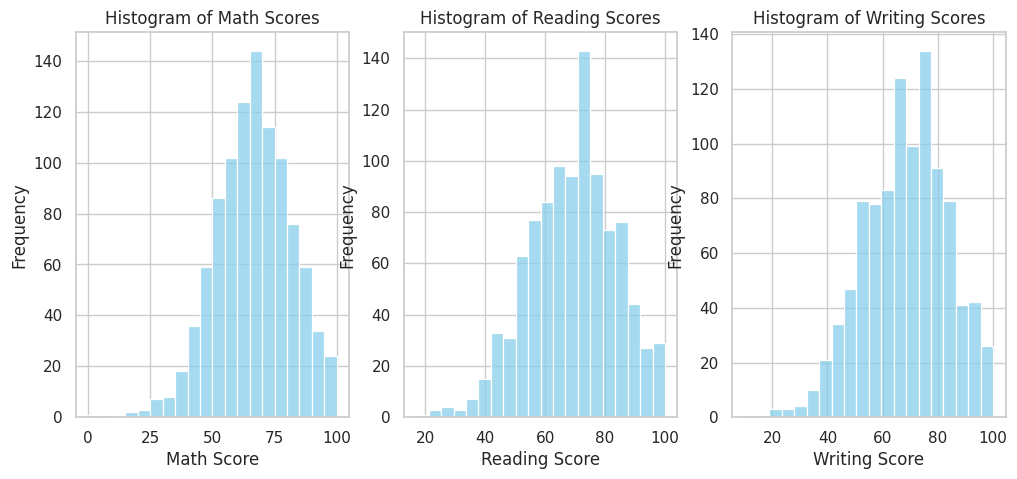

In [38]:
# Histogram plot for math_score, reading_score, writing_score
plt.figure(figsize= (12,5))

# Creating subplot for math_score
plt.subplot(1,3,1)
sns.histplot(df['math_score'], bins=20, kde=False, color='skyblue')
plt.title('Histogram of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

# Create subplot for reading_score
plt.subplot(1,3,2)
sns.histplot(df['reading_score'], bins=20, kde=False, color='skyblue')
plt.title('Histogram of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

# Create subplot for writing_score
plt.subplot(1,3,3)
sns.histplot(df['writing_score'], bins=20, kde=False, color='skyblue')
plt.title('Histogram of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

plt.show()

**Intrepretation:** The histograms for math, reading, and writing scores indicate left-skewed distributions, where most students have high scores, but a few students have significantly lower scores. This suggests that while the majority of students perform well in each subject, a small subset may be struggling, pulling the distribution tail to the left.

The mean is likely lower than the median in each case due to the influence of these lower scores.
Understanding the characteristics of these lower-scoring students (e.g., demographics, preparation course status, lunch type) may provide insight into targeted academic support strategies